# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
previsao_renda = pd.read_csv('banco.csv')
previsao_renda = previsao_renda.set_index('index')
previsao_renda = previsao_renda.drop('Unnamed: 0', axis=1)
previsao_renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [35]:
previsao = previsao_renda[['renda', 'posse_de_veiculo', 'posse_de_imovel']].copy()
previsao.head()

,renda,posse_de_veiculo,posse_de_imovel
index,,,
8682,3369.24,False,True
12830,6096.14,True,True
2885,5658.98,True,True
16168,7246.69,True,False
12438,4017.37,False,False


In [36]:
previsao.isna().sum()

renda               0
posse_de_veiculo    0
posse_de_imovel     0
dtype: int64

In [37]:
previsao.posse_de_veiculo = previsao.posse_de_veiculo.map({False: 'Falso', True: 'Verdadeiro'})
previsao.posse_de_imovel = previsao.posse_de_imovel.map({False: 'Nao', True: 'Sim'})
previsao.head()

,renda,posse_de_veiculo,posse_de_imovel
index,,,
8682,3369.24,Falso,Sim
12830,6096.14,Verdadeiro,Sim
2885,5658.98,Verdadeiro,Sim
16168,7246.69,Verdadeiro,Nao
12438,4017.37,Falso,Nao


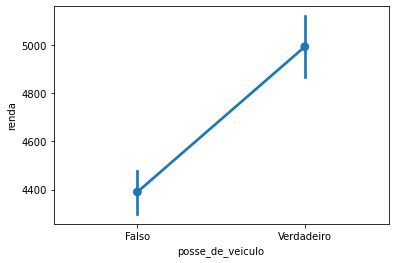

In [30]:
sns.pointplot(x='posse_de_veiculo', y='renda',
                   data=previsao, dodge=True, ci = 95);


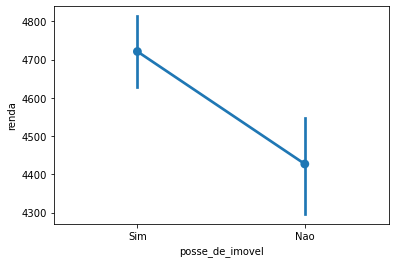

In [38]:
sns.pointplot(x='posse_de_imovel', y='renda',
                   data=previsao, dodge=True, ci = 95);

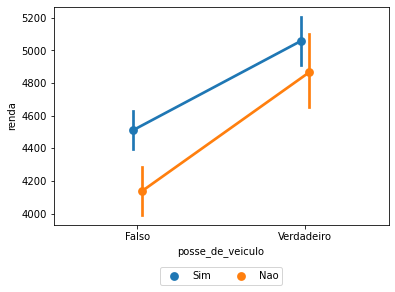

In [39]:
sns.pointplot(x='posse_de_veiculo', y='renda', hue='posse_de_imovel',
                   data=previsao, dodge=True, ci = 95)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3);

#### A posse de imovel parece explicar de forma significativa a renda melhor que posse de veiculo